In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import linear_model, decomposition, datasets
from sklearn import svm

In [2]:
# cd D:\Group-7

In [3]:
#retrieving data
parkingdata = pd.read_csv("parking_duration_of_parking_event_vs_street_ID.csv")
parkingdata = parkingdata.sample(n = 10000)
parkingdata.size

130000

In [4]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
10430612,Spencer,Lt COLLINS STREET,SPENCER STREET,KING STREET,4,2313S,07/08/2012 05:25:11 PM,07/08/2012 05:35:13 PM,602,1/2P TKT A M-SAT 7:30-19:30,0,911,1244
10370425,West Melbourne,BATMAN STREET,KING STREET,SPENCER STREET,4,11605S,06/08/2012 09:59:32 AM,06/08/2012 10:05:36 AM,364,4P MTR M-F 7:30-18:30,0,78,6083
886194,Spencer,COLLINS STREET,SPENCER STREET,KING STREET,3,2084N,25/10/2011 07:47:51 PM,25/10/2011 07:49:52 PM,121,P MTR M-SAT 19:30-20:30,0,528,1283
7807568,Jolimont,LANSDOWNE STREET,CATHEDRAL PLACE,ST ANDREWS PLACE,5,11875W,21/05/2012 12:21:43 PM,21/05/2012 01:06:24 PM,2681,1P MTR M-SAT 7:30-18:30,0,869,6301
9765089,Southbank,GRANT STREET,DODDS STREET,STURT STREET,3,9952N,18/07/2012 02:45:59 PM,18/07/2012 02:53:26 PM,447,3P TKT A M-SAT 7:30-18:30,0,728,7323


In [5]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
9703514,Rialto,BOURKE STREET,KING STREET,WILLIAM STREET,4,2461S,17/07/2012 07:30:08 AM,17/07/2012 07:48:53 AM,1125,1P MTR M-SAT 7:30-19:30,0,123,1385
2034628,County,SPENCER STREET,LONSDALE STREET,Lt BOURKE STREET,5,1549W,26/11/2011 06:33:29 AM,26/11/2011 06:34:50 AM,81,P/ 5 M-SUN 0:00-23:59,0,1285,918
1765145,Princes Theatre,BOURKE STREET,RUSSELL STREET,EXHIBITION STREET,4,2365S,18/11/2011 04:08:52 PM,18/11/2011 04:19:13 PM,621,1P TKT A M-SAT 7:30-19:30,0,123,1442
5316849,Queensberry,VICTORIA STREET,KING STREET,HAWKE STREET,3,7642N,03/03/2012 01:18:24 PM,03/03/2012 01:20:54 PM,150,1/4P M-SAT 7:30-18:30,0,1381,4001
5586098,Hardware,QUEEN STREET,Lt LONSDALE STREET,LONSDALE STREET,1,C1216,11/03/2012 02:58:20 PM,11/03/2012 03:44:15 PM,2755,1P SUN 7:30-18:30,0,1171,5568


## Data Wrangling

In [6]:
#checking the datatype of all the features
parkingdata.dtypes

Area Name                                 object
Street Name                               object
Between Street 1                          object
Between Street 2                          object
Side Of Street                             int64
Street Marker                             object
Arrival Time                              object
Departure Time                            object
Duration of Parking Event (in seconds)     int64
Sign                                      object
In Violation?                              int64
Street ID                                  int64
Device ID                                  int64
dtype: object

In [7]:
#Checking values of Area Name feature for typos
parkingdata['Area Name'].value_counts()

Queensberry        1062
Princes Theatre     772
Victoria Market     708
The Mac             635
Regency             619
Southbank           614
Hyatt               587
Titles              550
Rialto              475
County              434
Hardware            398
City Square         393
Chinatown           372
Banks               367
Magistrates         365
Courtney            361
Spencer             353
Jolimont            311
RACV                302
Supreme             197
Tavistock            76
Docklands            47
West Melbourne        2
Name: Area Name, dtype: int64

In [8]:
#Converting all the feature attributes to uppercase for uniformity

parkingdata['Area Name'] = parkingdata['Area Name'].str.upper()
parkingdata['Street Name'] = parkingdata['Street Name'].str.upper()
parkingdata['Between Street 1'] = parkingdata['Between Street 1'].str.upper()
parkingdata['Between Street 2'] = parkingdata['Between Street 2'].str.upper()
parkingdata['Street Marker'] = parkingdata['Street Marker'].str.upper()
parkingdata['Sign'] = parkingdata['Sign'].str.upper()

parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
10430612,SPENCER,LT COLLINS STREET,SPENCER STREET,KING STREET,4,2313S,07/08/2012 05:25:11 PM,07/08/2012 05:35:13 PM,602,1/2P TKT A M-SAT 7:30-19:30,0,911,1244
10370425,WEST MELBOURNE,BATMAN STREET,KING STREET,SPENCER STREET,4,11605S,06/08/2012 09:59:32 AM,06/08/2012 10:05:36 AM,364,4P MTR M-F 7:30-18:30,0,78,6083
886194,SPENCER,COLLINS STREET,SPENCER STREET,KING STREET,3,2084N,25/10/2011 07:47:51 PM,25/10/2011 07:49:52 PM,121,P MTR M-SAT 19:30-20:30,0,528,1283
7807568,JOLIMONT,LANSDOWNE STREET,CATHEDRAL PLACE,ST ANDREWS PLACE,5,11875W,21/05/2012 12:21:43 PM,21/05/2012 01:06:24 PM,2681,1P MTR M-SAT 7:30-18:30,0,869,6301
9765089,SOUTHBANK,GRANT STREET,DODDS STREET,STURT STREET,3,9952N,18/07/2012 02:45:59 PM,18/07/2012 02:53:26 PM,447,3P TKT A M-SAT 7:30-18:30,0,728,7323


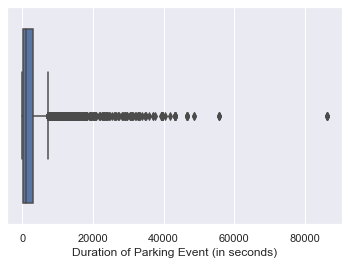

In [9]:
sns.boxplot(parkingdata['Duration of Parking Event (in seconds)'])

In [10]:
#Removing all redundant extra whitespaces
for x in parkingdata.columns:
    if parkingdata[x].dtype == object:
        parkingdata[x] = parkingdata[x].str.strip()

In [11]:
#Checking values of Street Name feature for typos
pd.set_option('display.max_rows', 10000)
parkingdata['Street Name'].value_counts()

LONSDALE STREET             977
QUEEN STREET                751
LA TROBE STREET             604
EXHIBITION STREET           588
COLLINS STREET              552
FRANKLIN STREET             539
ELIZABETH STREET            458
RUSSELL STREET              451
BOURKE STREET               442
LT LONSDALE STREET          342
LT COLLINS STREET           275
SPRING STREET               272
FLINDERS LANE               265
KING STREET                 256
ERROL STREET                232
WILLIAM STREET              206
LT BOURKE STREET            194
COVENTRY STREET             167
VICTORIA STREET             144
A'BECKETT STREET            141
SPENCER STREET              129
QUEENSBERRY STREET          124
CAPEL STREET                113
FLINDERS STREET             109
ALBERT STREET               106
THERRY STREET                86
LEVESON STREET               86
GRANT STREET                 85
O'CONNELL STREET             76
DORCAS STREET                75
KAVANAGH STREET              71
COBDEN S

In [12]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 1'].value_counts()

KING STREET            896
QUEEN STREET           774
QUEENSBERRY STREET     675
WILLIAM STREET         668
RUSSELL STREET         556
SPENCER STREET         478
SWANSTON STREET        467
EXHIBITION STREET      460
LT LONSDALE STREET     421
LT COLLINS STREET      364
LONSDALE STREET        359
VICTORIA STREET        327
BOURKE STREET          284
ELIZABETH STREET       278
LT BOURKE STREET       246
COLLINS STREET         245
FLINDERS LANE          210
LA TROBE STREET        155
WILLAM STREET          154
THERRY STREET          153
A'BECKETT STREET       134
FRANKLIN STREET        124
WELLS STREET           110
DODDS STREET           105
FLINDERS STREET         94
STURT STREET            94
HOWARD STREET           83
SOUTHBANK BOULEVARD     81
ERROL STREET            79
KINGS WAY               78
O'CONNELL STREET        72
VICTORIA PARADE         60
BALSTON STREET          57
ALBERT STREET           53
COBDEN STREET           51
PELHAM STREET           49
GISBORNE STREET         44
P

In [13]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 2'].value_counts()

WILLIAM STREET         883
VICTORIA STREET        816
QUEEN STREET           811
ELIZABETH STREET       798
EXHIBITION STREET      544
KING STREET            478
SPRING STREET          462
LONSDALE STREET        451
RUSSELL STREET         401
COLLINS STREET         364
LT BOURKE STREET       359
FLINDERS LANE          339
LT COLLINS STREET      284
SWANSTON STREET        278
LA TROBE STREET        253
BOURKE STREET          246
FLINDERS STREET        210
LT LONSDALE STREET     185
FRANKLIN STREET        153
DODDS STREET           150
ST KILDA ROAD          110
LANSDOWNE STREET        92
WELLS STREET            81
QUEENSBERRY STREET      80
LEVESON STREET          79
POWER STREET            78
CAPEL STREET            75
WALSH STREET            74
THERRY STREET           66
A'BECKETT STREET        65
ELM STREET              51
STURT STREET            42
GISBORNE STREET         42
HAWKE STREET            42
DUDLEY STREET           40
STANLEY STREET          36
EADES STREET            35
M

In [14]:
#check which columns have missing values
parkingdata.columns[parkingdata.isnull().any()]

Index([], dtype='object')

In [15]:
#converting object to datetime
parkingdata['Arrival Time'] = pd.to_datetime(parkingdata['Arrival Time'])
parkingdata['Departure Time'] = pd.to_datetime(parkingdata['Departure Time'])

In [16]:
#check if object has successfully been converted to datetime
parkingdata.dtypes

Area Name                                         object
Street Name                                       object
Between Street 1                                  object
Between Street 2                                  object
Side Of Street                                     int64
Street Marker                                     object
Arrival Time                              datetime64[ns]
Departure Time                            datetime64[ns]
Duration of Parking Event (in seconds)             int64
Sign                                              object
In Violation?                                      int64
Street ID                                          int64
Device ID                                          int64
dtype: object

In [17]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
10430612,SPENCER,LT COLLINS STREET,SPENCER STREET,KING STREET,4,2313S,2012-07-08 17:25:11,2012-07-08 17:35:13,602,1/2P TKT A M-SAT 7:30-19:30,0,911,1244
10370425,WEST MELBOURNE,BATMAN STREET,KING STREET,SPENCER STREET,4,11605S,2012-06-08 09:59:32,2012-06-08 10:05:36,364,4P MTR M-F 7:30-18:30,0,78,6083
886194,SPENCER,COLLINS STREET,SPENCER STREET,KING STREET,3,2084N,2011-10-25 19:47:51,2011-10-25 19:49:52,121,P MTR M-SAT 19:30-20:30,0,528,1283
7807568,JOLIMONT,LANSDOWNE STREET,CATHEDRAL PLACE,ST ANDREWS PLACE,5,11875W,2012-05-21 12:21:43,2012-05-21 13:06:24,2681,1P MTR M-SAT 7:30-18:30,0,869,6301
9765089,SOUTHBANK,GRANT STREET,DODDS STREET,STURT STREET,3,9952N,2012-07-18 14:45:59,2012-07-18 14:53:26,447,3P TKT A M-SAT 7:30-18:30,0,728,7323


In [18]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
9703514,RIALTO,BOURKE STREET,KING STREET,WILLIAM STREET,4,2461S,2012-07-17 07:30:08,2012-07-17 07:48:53,1125,1P MTR M-SAT 7:30-19:30,0,123,1385
2034628,COUNTY,SPENCER STREET,LONSDALE STREET,LT BOURKE STREET,5,1549W,2011-11-26 06:33:29,2011-11-26 06:34:50,81,P/ 5 M-SUN 0:00-23:59,0,1285,918
1765145,PRINCES THEATRE,BOURKE STREET,RUSSELL STREET,EXHIBITION STREET,4,2365S,2011-11-18 16:08:52,2011-11-18 16:19:13,621,1P TKT A M-SAT 7:30-19:30,0,123,1442
5316849,QUEENSBERRY,VICTORIA STREET,KING STREET,HAWKE STREET,3,7642N,2012-03-03 13:18:24,2012-03-03 13:20:54,150,1/4P M-SAT 7:30-18:30,0,1381,4001
5586098,HARDWARE,QUEEN STREET,LT LONSDALE STREET,LONSDALE STREET,1,C1216,2012-11-03 14:58:20,2012-11-03 15:44:15,2755,1P SUN 7:30-18:30,0,1171,5568


### SVM Classification Model on Predicitive Analytics question 1

In [19]:
#Target field identification
target = parkingdata['In Violation?']
target.head(10)

10430612    0
10370425    0
886194      0
7807568     0
9765089     0
1957117     0
3042707     0
384983      0
5966845     0
7446740     0
Name: In Violation?, dtype: int64

In [20]:
#Preliminary Target Features identification (Pre-Hill Climbing)

#Convert possible targets to dtype = int
intDf = parkingdata.copy()
#Drop useless fields
intDf.drop('Arrival Time', axis = 1, inplace = True)
intDf.drop('Departure Time', axis = 1, inplace = True)
intDf.drop('Street Marker', axis = 1, inplace = True)
#Drop target field
intDf.drop('In Violation?', axis = 1, inplace = True)
#Drop already int fields (Will add back after)
intDf.drop('Side Of Street', axis = 1, inplace = True)
intDf.drop('Duration of Parking Event (in seconds)', axis = 1, inplace = True)
intDf.drop('Street ID', axis = 1, inplace = True)
intDf.drop('Device ID', axis = 1, inplace = True)

#Transform the remainder non-int fields' values to unique int identifiers
for column in intDf:
    unique_vals = intDf[column].unique()
    intDf[column].replace(to_replace = unique_vals, value = list(range(len(unique_vals))), inplace = True)

#Create dataframe for all the relevant features
features = intDf.copy()

#Add back int fields (If not the target field)
features['Side Of Street'] = parkingdata['Side Of Street']
features['Duration of Parking Event (in seconds)'] = parkingdata['Duration of Parking Event (in seconds)']
features['Street ID'] = parkingdata['Street ID']
features['Device ID'] = parkingdata['Device ID']
#Add back datetime features with only the meaningful subset of data
features['Arrival Hour'] = parkingdata['Arrival Time'].dt.hour
features['Departure Hour'] = parkingdata['Departure Time'].dt.hour

#Table view of features dataframe
features.head(10)

,Area Name,Street Name,Between Street 1,Between Street 2,Sign,Side Of Street,Duration of Parking Event (in seconds),Street ID,Device ID,Arrival Hour,Departure Hour
10430612,0,0,0,0,0,4,602,911,1244,17,17
10370425,1,1,1,1,1,4,364,78,6083,9,10
886194,0,2,0,0,2,3,121,528,1283,19,19
7807568,2,3,2,2,3,5,2681,869,6301,12,13
9765089,3,4,3,3,4,3,447,728,7323,14,14
1957117,4,2,4,4,5,3,686,528,1245,10,10
3042707,5,5,5,5,5,1,872,681,2811,12,12
384983,6,6,1,6,6,4,935,1381,3912,12,12
5966845,7,7,6,7,5,3,1633,926,1681,10,10
7446740,3,4,3,3,4,3,10423,728,4644,9,12


In [21]:
#Parameter Tuning

#Define the parameters to tune and the values to tune to
param_grid = {'C': np.logspace(-4, 4, 20), 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
             'max_iter' : [100, 1000, 2500, 5000]}

In [22]:
#Create the Grid Search to go through the model parameters
cv_method = RepeatedStratifiedKFold(n_splits = 5, 
                                    n_repeats = 1, 
                                    random_state = 1)
        

clf_GS = GridSearchCV(estimator = SVC(), param_grid = param_grid, cv = cv_method, verbose=True, scoring = 'accuracy', return_train_score = True, n_jobs=-1)

In [23]:
#Fit the model with the dataset
best_clf = clf_GS.fit(features, target)
#LogisticRegression().get_params().keys()

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 32.6min
[Parallel(n_jobs=-1)]: Done 6400 out of 6400 | elapsed: 34.6min finished
C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data

In [24]:
clf_GS.best_params_

{'C': 11.288378916846883, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': 1000}

In [25]:
#Find the best values for the  parameters of the model (Formatted output)
best_gamma = best_clf.best_estimator_.get_params()['gamma']
best_C = best_clf.best_estimator_.get_params()['C']
best_max =  best_clf.best_estimator_.get_params()['max_iter']
best_kernel =  best_clf.best_estimator_.get_params()['kernel']

print('Best gamma:', best_gamma)
print('Best C:', best_C)
print('Best max iteration:', best_max)
print('Best kernel:', best_kernel)

Best gamma: 0.001
Best C: 11.288378916846883
Best max iteration: 1000
Best kernel: rbf


In [26]:
#Visualise the parameter configurations from fitting the model with the dataset
results_svm = pd.DataFrame(clf_GS.cv_results_['params'])
results_svm['test_score'] = clf_GS.cv_results_['mean_test_score']
results_svm

,C,gamma,kernel,max_iter,test_score
0,0.000100,1.000,rbf,100,0.1466
1,0.000100,1.000,rbf,1000,0.2133
2,0.000100,1.000,rbf,2500,0.8644
3,0.000100,1.000,rbf,5000,0.8644
4,0.000100,1.000,poly,100,0.4319
5,0.000100,1.000,poly,1000,0.3850
6,0.000100,1.000,poly,2500,0.4946
7,0.000100,1.000,poly,5000,0.6623
8,0.000100,1.000,sigmoid,100,0.8644
9,0.000100,1.000,sigmoid,1000,0.8644


In [27]:
#Re-Define model with the optimal parameter values AFTER HILL CLIMBING
SVM = metric = SVC(  C = best_C,
                               gamma = best_gamma, 
                               kernel = best_kernel, 
                               max_iter = best_max 
                               )

In [28]:
# Hill climbing w/ SVM
new_Ind = []
cur_MaxScore = 0.0
col_num = len(features.columns)
col_Ind_Random = shuffle(range(0, col_num), random_state = 1)
features_array = features.values

for cur_f in range(col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = features_array[:, new_Ind]
    x_train, x_test, y_train, y_test = train_test_split(newData, target, test_size=0.2, random_state=1)
    fit = SVM.fit(x_train, y_train)
    cur_Score = SVM.score(x_test, y_test)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print ("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
print("\nIndexs of the desired features")
print(new_Ind)

C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Score with 1 selected features: 0.143


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Score with 2 selected features: 0.351


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Score with 3 selected features: 0.485


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Score with 4 selected features: 0.8435


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Score with 5 selected features: 0.877


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)



Indexs of the desired features
[2, 3, 4, 1, 6]


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [29]:
features_hc = pd.DataFrame()
for index in new_Ind:
    colName = features.columns[index]
    features_hc[colName] = features[colName]
features_hc.head(10)

,Between Street 1,Between Street 2,Sign,Street Name,Duration of Parking Event (in seconds)
10430612,0,0,0,0,602
10370425,1,1,1,1,364
886194,0,0,2,2,121
7807568,2,2,3,3,2681
9765089,3,3,4,4,447
1957117,4,4,5,2,686
3042707,5,5,5,5,872
384983,1,6,6,6,935
5966845,6,7,5,7,1633
7446740,3,3,4,4,10423


In [30]:
bestModel = clf_GS.fit(features_hc, target)

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 6400 out of 6400 | elapsed: 27.0min finished
C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data

In [31]:
clf_GS.best_params_

{'C': 0.004832930238571752, 'gamma': 1, 'kernel': 'linear', 'max_iter': 2500}

In [32]:
#Find the best values for the  parameters of the model (Formatted output)
best_gamma = best_clf.best_estimator_.get_params()['gamma']
best_C = best_clf.best_estimator_.get_params()['C']
best_max =  best_clf.best_estimator_.get_params()['max_iter']
best_kernel =  best_clf.best_estimator_.get_params()['kernel']

print('Best gamma:', best_gamma)
print('Best C:', best_C)
print('Best max iteration:', best_max)
print('Best kernel:', best_kernel)

Best gamma: 1
Best C: 0.004832930238571752
Best max iteration: 2500
Best kernel: linear


In [33]:
#Visualise the parameter configurations from fitting the model with the dataset
results_svm = pd.DataFrame(clf_GS.cv_results_['params'])
results_svm['test_score'] = clf_GS.cv_results_['mean_test_score']
results_svm

,C,gamma,kernel,max_iter,test_score
0,0.000100,1.000,rbf,100,0.4257
1,0.000100,1.000,rbf,1000,0.6997
2,0.000100,1.000,rbf,2500,0.8644
3,0.000100,1.000,rbf,5000,0.8644
4,0.000100,1.000,poly,100,0.4222
5,0.000100,1.000,poly,1000,0.5821
6,0.000100,1.000,poly,2500,0.5719
7,0.000100,1.000,poly,5000,0.5820
8,0.000100,1.000,sigmoid,100,0.8644
9,0.000100,1.000,sigmoid,1000,0.8644


In [34]:
#Re-Define model with the optimal parameter values AFTER HILL CLIMBING
SVM = metric = SVC(  C = best_C,
                               gamma = best_gamma, 
                               kernel = best_kernel, 
                               max_iter = best_max 
                               )

In [35]:
#Defining training and testing groups
x_train, x_test, y_train, y_test = train_test_split(features_hc, target, test_size = 0.5, random_state = 4)

#Training the model previously defined
SVM.fit(x_train, y_train)

#Obtaining and printing out results from the model (Confusion Matrix)
predicted = SVM.predict(x_test)
cm = confusion_matrix(y_test,predicted)
print("Confusion Matrix")
print(cm)

#Printing the numerical result of the confusion matrix
print("\n[Train/test split] score: {:.5f}".format(SVM.score(x_test, y_test)))

Confusion Matrix
[[4085  199]
 [ 364  352]]

[Train/test split] score: 0.88740


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
